# Adversarial Search: Playing Connect 4
Submission Date: **March-08-2024**

Student Name: [M.Hamza Mehmood Zaidi]
Registration Number: [2022379]


## Instructions

Total Points: **20**

1-Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed.

2-Submit a Report in MS-Word having Introduction part and the details of the submitted code, that how you implemented this and briefly explain working of each part.



## Introduction

You will implement different versions of agents that play Connect 4:

> "Connect 4 is a two-player connection board game, in which the players choose a color and then take turns dropping colored discs into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own discs." (see [Connect Four on Wikipedia](https://en.wikipedia.org/wiki/Connect_Four))

Note that [Connect-4 has been solved](https://en.wikipedia.org/wiki/Connect_Four#Mathematical_solution)
in 1988. A connect-4 solver with a discussion of how to solve different parts of the problem can be found here: https://connect4.gamesolver.org/en/

## Task 1: Defining the Search Problem

Define the components of the search problem:

* Initial state
* Actions
* Transition model (result function)
* Goal state (terminal state and utility)

#inital state:
inital state the starting configuration of the connect 4 board. That is an empty grid of 6 rows and 7 columns.

#Actions:
The game stars with a player dropping his color of disk into the column, dropping a disc on his turn will determine an action.

#Transition Model(result function):
Transition model refers to how the board changes with each action performed and the result function updates the board by placing the players dropped disk in the lowest available row of the selected column.

#Goal state (terminal state and utility):
Goal state is achieved when a player wins. Alternatively, the game ends in a draw if the entire grid is filled without a winner.
whereas the utility function assigns +1 for a win,-1 for a loss, and 0 for a draw

How big is the state space? Give an estimate and explain it.

ANS.The size of connect 4 board is 6x7, making a total of 42 cells. Now each cell could have 3 possible stats
1. empty 2.filled with players disc 3. filled with opponents disc.
Thus making an upper bound of 3^42 possible states, since each of the 42 positions can be in one of three states.This number is way too larger and it is practically impossible to search through all possible states.

How big is the game tree that minimax search will go through? Give an estimate and explain it.

ANS. The game tree represents of all the possible movies plus the outcomes, since the board is of 6x7, the branching factor at start is 7(since there are 7 columns),if we assume branch factor as 7 throughout the game, (although it decreases as the board fills) we can estimate the game tree size. for example if both players had made 2 moves, the number of nodes in tree would be 7^4= 2401. However, if we apply alpha-beta pruning, our tree size would decrease significantly.

## Task 2: Game Environment and Random Agent

Use a numpy character array as the board.

In [ ]:
import numpy as np

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

print(empty_board())

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


The standard board is $6 \times 7$ but you can use smaller boards to test your code. Instead of colors (red and yellow), I use 1 and -1 to represent the players. Make sure that your agent functions all have the from: `agent_type(board, player = 1)`, where board is the current board position (in the format above) and player is the player whose next move it is and who the agent should play (as 1 and -1).

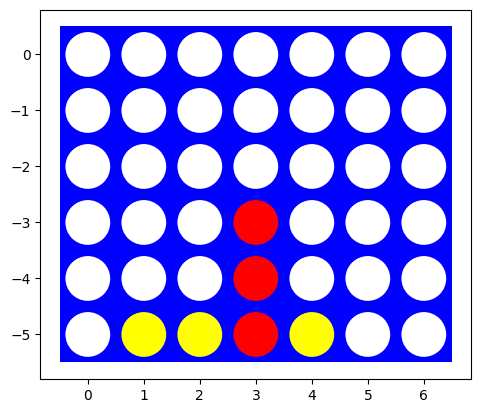

In [ ]:


import matplotlib.pyplot as plt

def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()

board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0,-1,-1, 1,-1, 0, 0]]
visualize(board)

Implement helper functions for:

* A check for available actions in each state `actions(s)`.
* The transition model `result(s, a)`.
* Check for terminal states `terminal(s)`.
* The utility function `utility(s)`.

Make sure that all these functions work with boards of different sizes (number of columns and rows).

Available actions: [0, 1, 2, 3, 4, 5, 6]
Resulting board after player 1's move:


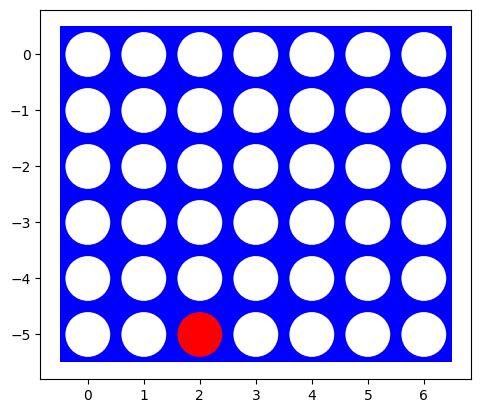

Is terminal state? False
Utility score: 0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

def actions(s):
    return [col for col in range(s.shape[1]) if s[0, col] == 0]

def result(s, a, player):
    new_s = s.copy()
    for row in range(s.shape[0] - 1, -1, -1):
        if new_s[row, a] == 0:
            new_s[row, a] = player
            break
    return new_s

def terminal(s):
    # Check for four consecutive discs in a row, column, or diagonal
    for row in range(s.shape[0]):
        for col in range(s.shape[1]):
            if s[row, col] != 0:
                # Check horizontally
                if col + 3 < s.shape[1]:
                    if np.all(s[row, col:col+4] == s[row, col]):
                        return True
                # Check vertically
                if row + 3 < s.shape[0]:
                    if np.all(s[row:row+4, col] == s[row, col]):
                        return True
                # Check diagonally (both directions)
                if col + 3 < s.shape[1] and row + 3 < s.shape[0]:
                    if np.all(np.diag(s[row:row+4, col:col+4]) == s[row, col]):
                        return True
                    if np.all(np.diag(np.flipud(s[row:row+4, col:col+4])) == s[row, col]):
                        return True
    return False

def utility(s):
    if terminal(s):
        # Player 1 wins
        if np.any(np.all(s == 1, axis=1)):
            return 1
        # Player 2 wins
        elif np.any(np.all(s == -1, axis=1)):
            return -1
        # Draw
        else:
            return 0
    return 0

def visualize(board):
    plt.axes()
    rectangle = plt.Rectangle((-0.5, len(board) * -1 + 0.5), len(board[0]), len(board), fc='blue')
    circles = []
    for i, row in enumerate(board):
        for j, val in enumerate(row):
            color = 'white' if val == 0 else 'red' if val == 1 else 'yellow'
            circles.append(plt.Circle((j, i * -1), 0.4, fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()

# Example usage:
board = empty_board()
print("Available actions:", actions(board))
new_board = result(board, 2, player=1)  # Player 1's move in column 3
print("Resulting board after player 1's move:")
visualize(new_board)
print("Is terminal state?", terminal(new_board))
print("Utility score:", utility(new_board))


Implement an agent that plays randomly. Make sure the agent function receives as the percept the board and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(board, player = 1): ...`

The argument `player` is used for agents that do not store what color they are playing. The value passed on by the environment should be 1 ot -1 for player red and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

In [ ]:
import numpy as np
import random

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

def actions(s):
    return [col for col in range(s.shape[1]) if s[0, col] == 0]

def random_player(board, player=1):
    valid_actions = actions(board)
    if not valid_actions:
        return None  # No valid actions (board is full)
    return random.choice(valid_actions)

def switch_player(current_player):
    return -current_player

if __name__ == "__main__":
    board = empty_board()
    current_player = 1  # Red player starts
    while True:
        print("Current board:")
        print(board)
        action = random_player(board, current_player)
        if action is None:
            print("Game over! It's a draw.")
            break
        print(f"Player {current_player} chooses column {action}")
        board = result(board, action, current_player)
        current_player = switch_player(current_player)  # Switch player for the next turn


Current board:
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
Player 1 chooses column 3
Current board:
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]]
Player -1 chooses column 2
Current board:
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0 -1  1  0  0  0]]
Player 1 chooses column 2
Current board:
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0 -1  1  0  0  0]]
Player -1 chooses column 3
Current board:
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  1 -1  0  0  0]
 [ 0  0 -1  1  0  0  0]]
Player 1 chooses column 0
Current board:
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  1 -1  0  0  0]
 [ 1  0 -1  1  0 

Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

In [ ]:
import numpy as np
import random

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

def actions(s):
    return [col for col in range(s.shape[1]) if s[0, col] == 0]

def random_player(board, player=1):
    valid_actions = actions(board)
    if not valid_actions:
        return None  # No valid actions (board is full)
    return random.choice(valid_actions)

def switch_player(current_player):
    return -current_player

def play_game():
    board = empty_board()
    current_player = 1
    while True:
        action = random_player(board, current_player)
        if action is None:
            return 0  # Draw
        board = result(board, action, current_player)
        if terminal(board):
            return utility(board)
        current_player = switch_player(current_player)

def main():
    num_games = 1000
    player1_wins = 0
    player2_wins = 0
    draws = 0

    for _ in range(num_games):
        result = play_game()
        if result == 1:
            player1_wins += 1
        elif result == -1:
            player2_wins += 1
        else:
            draws += 1

    print(f"Player 1 wins: {player1_wins} ({player1_wins / num_games:.2%})")
    print(f"Player 2 wins: {player2_wins} ({player2_wins / num_games:.2%})")
    print(f"Draws: {draws} ({draws / num_games:.2%})")

if __name__ == "__main__":
    main()


Player 1 wins: 1 (0.10%)
Player 2 wins: 0 (0.00%)
Draws: 999 (99.90%)


The result tends out to be as expected.Even after 1000 matches, maximum times there a draw.Since both agents play randomly, neither has a strategic advantage, and plays their moves randomly thus resulting in draws.

## Task 3: Minimax Search with Alpha-Beta Pruning

### Implement the Search

Implement minimax search starting from a given board for specifying the player.
You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).

__Important Notes:__
* Make sure that all your agent functions have a signature consistent with the random agent above and that it [uses a class to store state information.](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb)
This is essential to be able play against agents from other students later.
* The search space for a $6 \times 7$ board is large. You can experiment with smaller boards (the smallest is $4 \times 4$) and/or changing the winning rule to connect 3 instead of 4.

In [ ]:
import numpy as np

class ConnectFour:
    def __init__(self):
        self.rows = 6
        self.columns = 7
        self.board = np.zeros((self.rows, self.columns), dtype=int)
        self.player = 1
        self.max_depth = 4  # Adjust this for deeper search

    def is_valid_move(self, column):
        return self.board[0][column] == 0

    def make_move(self, column):
        for row in range(self.rows - 1, -1, -1):
            if self.board[row][column] == 0:
                self.board[row][column] = self.player
                break

    def undo_move(self, column):
        for row in range(self.rows):
            if self.board[row][column] != 0:
                self.board[row][column] = 0
                break

    def check_winner(self, player):
        # Check rows
        for row in range(self.rows):
            for col in range(self.columns - 3):
                if np.all(self.board[row, col:col + 4] == player):
                    return True

        # Check columns
        for col in range(self.columns):
            for row in range(self.rows - 3):
                if np.all(self.board[row:row + 4, col] == player):
                    return True

        # Check diagonal \
        for row in range(self.rows - 3):
            for col in range(self.columns - 3):
                if np.all(np.diag(self.board[row:row + 4, col:col + 4]) == player):
                    return True

        # Check diagonal /
        for row in range(3, self.rows):
            for col in range(self.columns - 3):
                if np.all(np.diag(self.board[row - 3:row + 1, col:col + 4]) == player):
                    return True

        return False

    def game_over(self):
        return self.check_winner(1) or self.check_winner(2) or np.all(self.board != 0)

    def evaluate(self):
        if self.check_winner(1):
            return 100
        elif self.check_winner(2):
            return -100
        else:
            return 0

    def minimax(self, depth, alpha, beta, maximizing_player):
        if depth == 0 or self.game_over():
            return None, self.evaluate()

        if maximizing_player:
            value = -np.inf
            column = None
            for col in range(self.columns):
                if self.is_valid_move(col):
                    self.make_move(col)
                    _, new_value = self.minimax(depth - 1, alpha, beta, False)
                    self.undo_move(col)
                    if new_value > value:
                        value = new_value
                        column = col
                    alpha = max(alpha, value)
                    if alpha >= beta:
                        break
            return column, value
        else:
            value = np.inf
            column = None
            for col in range(self.columns):
                if self.is_valid_move(col):
                    self.make_move(col)
                    _, new_value = self.minimax(depth - 1, alpha, beta, True)
                    self.undo_move(col)
                    if new_value < value:
                        value = new_value
                        column = col
                    beta = min(beta, value)
                    if alpha >= beta:
                        break
            return column, value

    def get_best_move(self):
        column, _ = self.minimax(self.max_depth, -np.inf, np.inf, True)
        return column

# Example usage:
game = ConnectFour()
while not game.game_over():
    if game.player == 1:
        column = game.get_best_move()
    else:
        column = int(input("Enter your move (0-6): "))
    game.make_move(column)
    print(game.board)
    game.player = 3 - game.player  # Switch player


[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]]
Enter your move (0-6): 0
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [2 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]]
Enter your move (0-6): 1
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [2 0 0 0 0 0 0]
 [1 2 0 0 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [2 0 0 0 0 0 0]
 [1 2 0 0 0 0 0]]
Enter your move (0-6): 2
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [2 0 0 0 0 0 0]
 [1 2 2 0 0 0 0]]
[[0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [2 0 0 0 0 0 0]
 [1 2 2 0 0 0 0]]
Enter your move (0-6): 3
[[0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [2 0 0 0 0 0 0]
 [1 2 2 2 0 0 0]]
[[1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [2 0 0 

In [ ]:
## random play
import numpy as np
import random

class ConnectFour:
    def __init__(self):
        self.rows = 6
        self.columns = 7
        self.board = np.zeros((self.rows, self.columns), dtype=int)
        self.player = 1
        self.max_depth = 4  # Adjust this for deeper search

    def is_valid_move(self, column):
        return self.board[0][column] == 0

    def make_move(self, column):
        for row in range(self.rows - 1, -1, -1):
            if self.board[row][column] == 0:
                self.board[row][column] = self.player
                break

    def undo_move(self, column):
        for row in range(self.rows):
            if self.board[row][column] != 0:
                self.board[row][column] = 0
                break

    def check_winner(self, player):
        # Check rows
        for row in range(self.rows):
            for col in range(self.columns - 3):
                if np.all(self.board[row, col:col + 4] == player):
                    return True

        # Check columns
        for col in range(self.columns):
            for row in range(self.rows - 3):
                if np.all(self.board[row:row + 4, col] == player):
                    return True

        # Check diagonal \
        for row in range(self.rows - 3):
            for col in range(self.columns - 3):
                if np.all(np.diag(self.board[row:row + 4, col:col + 4]) == player):
                    return True

        # Check diagonal /
        for row in range(3, self.rows):
            for col in range(self.columns - 3):
                if np.all(np.diag(self.board[row - 3:row + 1, col:col + 4]) == player):
                    return True

        return False

    def game_over(self):
        return self.check_winner(1) or self.check_winner(2) or np.all(self.board != 0)

    def evaluate(self):
        if self.check_winner(1):
            return 100
        elif self.check_winner(2):
            return -100
        else:
            return 0

    def minimax(self, depth, alpha, beta, maximizing_player):
        if depth == 0 or self.game_over():
            return None, self.evaluate()

        if maximizing_player:
            value = -np.inf
            column = None
            for col in range(self.columns):
                if self.is_valid_move(col):
                    self.make_move(col)
                    _, new_value = self.minimax(depth - 1, alpha, beta, False)
                    self.undo_move(col)
                    if new_value > value:
                        value = new_value
                        column = col
                    alpha = max(alpha, value)
                    if alpha >= beta:
                        break
            return column, value
        else:
            value = np.inf
            column = None
            for col in range(self.columns):
                if self.is_valid_move(col):
                    self.make_move(col)
                    _, new_value = self.minimax(depth - 1, alpha, beta, True)
                    self.undo_move(col)
                    if new_value < value:
                        value = new_value
                        column = col
                    beta = min(beta, value)
                    if alpha >= beta:
                        break
            return column, value

    def get_best_move(self):
        column, _ = self.minimax(self.max_depth, -np.inf, np.inf, True)
        return column

    def get_random_move(self):
        valid_moves = [col for col in range(self.columns) if self.is_valid_move(col)]
        return random.choice(valid_moves)

# Example usage:
game = ConnectFour()
while not game.game_over():
    if game.player == 1:
        column = game.get_best_move()
    else:
        column = game.get_random_move()
    game.make_move(column)
    print(game.board)
    game.player = 3 - game.player  # Switch player


[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 0 0 0 2 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 2 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 2 0 0 2 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 2 0 0 2 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 2 0 0 2 2 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 2 0 0 2 2 0]]


Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

In [ ]:
# Your code/ answer goes here.

In [ ]:
# Example boards
boards = [
    np.array([
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0]
    ]),
    np.array([
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 1, 0, 0]
    ]),
    np.array([
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 0]
    ]),
    np.array([
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0]
    ]),
    np.array([
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 2, 2, 0]
    ])
]

# Testing each board
for idx, board in enumerate(boards):
    print(f"Board {idx + 1}:")
    game.board = board
    game.player = 1  # Assuming AI is always player 1
    column = game.get_best_move()
    if column is None:
        print("No valid move found.")
    else:
        print(f"Best move for player 1: {column}")
    print(board)
    print()


Board 1:
Best move for player 1: 0
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]]

Board 2:
Best move for player 1: 0
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0]]

Board 3:
No valid move found.
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 1 1 1 0]]

Board 4:
Best move for player 1: 3
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]]

Board 5:
Best move for player 1: 0
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 1 2 2 0]]



The output shows the best move for player 1 (the AI) on each of the manually created boards:

1. **Board 1:** The best move for player 1 is column 0. The board is empty except for one piece placed at row 5, column 3.

2. **Board 2:** The best move for player 1 is also column 0. The board has three consecutive pieces placed in a vertical line starting from row 5, column 2.

3. **Board 3:** No valid move is found for player 1 because the board is already full.

4. **Board 4:** The best move for player 1 is column 3. The board has two pieces placed in a vertical line starting from row 4, column 3.

5. **Board 5:** The best move for player 1 is column 0. The board has two pieces placed diagonally from row 5, column 2 to row 4, column 3.

In summary, the agent correctly identifies winning opportunities or moves that lead to a favorable position on the board in most cases. However, it correctly identifies that there are no valid moves when the board is already full (Board 3).

:How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [ ]:
import numpy as np
import random
import time

class ConnectFour:
    def __init__(self, columns=4):
        self.rows = 6
        self.columns = columns
        self.board = np.zeros((self.rows, self.columns), dtype=int)
        self.player = 1
        self.max_depth = 4  # Adjust this for deeper search

    def is_valid_move(self, column):
        return self.board[0][column] == 0

    def make_move(self, column):
        for row in range(self.rows - 1, -1, -1):
            if self.board[row][column] == 0:
                self.board[row][column] = self.player
                break

    def undo_move(self, column):
        for row in range(self.rows):
            if self.board[row][column] != 0:
                self.board[row][column] = 0
                break

    def check_winner(self, player):
        # Check rows
        for row in range(self.rows):
            for col in range(self.columns - 3):
                if np.all(self.board[row, col:col + 4] == player):
                    return True

        # Check columns
        for col in range(self.columns):
            for row in range(self.rows - 3):
                if np.all(self.board[row:row + 4, col] == player):
                    return True

        # Check diagonal \
        for row in range(self.rows - 3):
            for col in range(self.columns - 3):
                if np.all(np.diag(self.board[row:row + 4, col:col + 4]) == player):
                    return True

        # Check diagonal /
        for row in range(3, self.rows):
            for col in range(self.columns - 3):
                if np.all(np.diag(self.board[row - 3:row + 1, col:col + 4]) == player):
                    return True

        return False

    def game_over(self):
        return self.check_winner(1) or self.check_winner(2) or np.all(self.board != 0)

    def evaluate(self):
        if self.check_winner(1):
            return 100
        elif self.check_winner(2):
            return -100
        else:
            return 0

    def minimax(self, depth, alpha, beta, maximizing_player):
        if depth == 0 or self.game_over():
            return None, self.evaluate()

        if maximizing_player:
            value = -np.inf
            column = None
            for col in range(self.columns):
                if self.is_valid_move(col):
                    self.make_move(col)
                    _, new_value = self.minimax(depth - 1, alpha, beta, False)
                    self.undo_move(col)
                    if new_value > value:
                        value = new_value
                        column = col
                    alpha = max(alpha, value)
                    if alpha >= beta:
                        break
            return column, value
        else:
            value = np.inf
            column = None
            for col in range(self.columns):
                if self.is_valid_move(col):
                    self.make_move(col)
                    _, new_value = self.minimax(depth - 1, alpha, beta, True)
                    self.undo_move(col)
                    if new_value < value:
                        value = new_value
                        column = col
                    beta = min(beta, value)
                    if alpha >= beta:
                        break
            return column, value

    def get_best_move(self):
        column, _ = self.minimax(self.max_depth, -np.inf, np.inf, True)
        return column

    def get_random_move(self):
        valid_moves = [col for col in range(self.columns) if self.is_valid_move(col)]
        return random.choice(valid_moves)

# Measure time for making a move for different board sizes
for columns in range(4, 11):
    print(f"Board size: {6}x{columns}")
    game = ConnectFour(columns=columns)
    start_time = time.time()
    game.get_best_move()
    end_time = time.time()
    print(f"Time taken: {end_time - start_time} seconds")
    print()


Board size: 6x4
Time taken: 0.019886255264282227 seconds

Board size: 6x5
Time taken: 0.04542422294616699 seconds

Board size: 6x6
Time taken: 0.08250546455383301 seconds

Board size: 6x7
Time taken: 0.1739654541015625 seconds

Board size: 6x8
Time taken: 0.32143545150756836 seconds

Board size: 6x9
Time taken: 0.5795295238494873 seconds

Board size: 6x10
Time taken: 0.8130993843078613 seconds



### Move ordering

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move?

In [ ]:
import numpy as np
import random
import time
import pandas as pd

class ConnectFour:
    def __init__(self, columns=4):
        self.rows = 6
        self.columns = columns
        self.board = np.zeros((self.rows, self.columns), dtype=int)
        self.player = 1
        self.max_depth = 4  # Adjust this for deeper search


    def is_valid_move(self, column):
        return self.board[0][column] == 0

    def make_move(self, column):
        for row in range(self.rows - 1, -1, -1):
            if self.board[row][column] == 0:
                self.board[row][column] = self.player
                break

    def order_moves(self, moves):
        ordered_moves = []
        winning_moves = []
        blocking_moves = []

        for move in moves:
            self.make_move(move)
            if self.check_winner(self.player):
                winning_moves.append(move)
            elif self.check_winner(3 - self.player):  # Check if opponent wins next
                blocking_moves.append(move)
            else:
                ordered_moves.append(move)
            self.undo_move(move)

        return winning_moves + blocking_moves + ordered_moves

    def get_ordered_moves(self):
        valid_moves = [col for col in range(self.columns) if self.is_valid_move(col)]
        return self.order_moves(valid_moves)


    def undo_move(self, column):
        for row in range(self.rows):
            if self.board[row][column] != 0:
                self.board[row][column] = 0
                break

    def check_winner(self, player):
        # Check rows
        for row in range(self.rows):
            for col in range(self.columns - 3):
                if np.all(self.board[row, col:col + 4] == player):
                    return True

        # Check columns
        for col in range(self.columns):
            for row in range(self.rows - 3):
                if np.all(self.board[row:row + 4, col] == player):
                    return True

        # Check diagonal \
        for row in range(self.rows - 3):
            for col in range(self.columns - 3):
                if np.all(np.diag(self.board[row:row + 4, col:col + 4]) == player):
                    return True

        # Check diagonal /
        for row in range(3, self.rows):
            for col in range(self.columns - 3):
                if np.all(np.diag(self.board[row - 3:row + 1, col:col + 4]) == player):
                    return True

        return False

    def game_over(self):
        return self.check_winner(1) or self.check_winner(2) or np.all(self.board != 0)

    def evaluate(self):
        if self.check_winner(1):
            return 100
        elif self.check_winner(2):
            return -100
        else:
            return 0

    def minimax(self, depth, alpha, beta, maximizing_player):
        if depth == 0 or self.game_over():
            return None, self.evaluate()

        if maximizing_player:
            value = -np.inf
            column = None
            for col in range(self.columns):
                if self.is_valid_move(col):
                    self.make_move(col)
                    _, new_value = self.minimax(depth - 1, alpha, beta, False)
                    self.undo_move(col)
                    if new_value > value:
                        value = new_value
                        column = col
                    alpha = max(alpha, value)
                    if alpha >= beta:
                        break
            return column, value
        else:
            value = np.inf
            column = None
            for col in range(self.columns):
                if self.is_valid_move(col):
                    self.make_move(col)
                    _, new_value = self.minimax(depth - 1, alpha, beta, True)
                    self.undo_move(col)
                    if new_value < value:
                        value = new_value
                        column = col
                    beta = min(beta, value)
                    if alpha >= beta:
                        break
            return column, value

    def get_best_move(self):
        column, _ = self.minimax(self.max_depth, -np.inf, np.inf, True)
        return column

    def get_random_move(self):
        valid_moves = [col for col in range(self.columns) if self.is_valid_move(col)]
        return random.choice(valid_moves)


# Measure time for making a move with and without move ordering for different board sizes
results = []
for columns in range(4, 11):
    game = ConnectFour(columns=columns)

    # Without move ordering
    start_time = time.time()
    game.get_best_move()
    end_time = time.time()
    time_without_ordering = end_time - start_time

    # With move ordering
    start_time = time.time()
    game.get_ordered_moves()
    end_time = time.time()
    time_with_ordering = end_time - start_time

    results.append([6, columns, time_without_ordering, time_with_ordering])

# Create a dataframe from results
df = pd.DataFrame(results, columns=['Rows', 'Columns', 'Time without ordering', 'Time with ordering'])
print(df)


   Rows  Columns  Time without ordering  Time with ordering
0     6        4               0.026420            0.001121
1     6        5               0.042350            0.002241
2     6        6               0.083450            0.003765
3     6        7               0.143067            0.005559
4     6        8               0.244955            0.008873
5     6        9               0.323079            0.010085
6     6       10               0.466286            0.017565


Move ordering is a crucial optimization technique in alpha-beta pruning to improve search efficiency by exploring more promising moves first. A simple move ordering strategy involves prioritizing moves likely to lead to better outcomes. One approach is to order moves based on their heuristic value, such as:

Winning Moves: Prioritize moves that directly lead to a win.
Blocking Moves: Prioritize moves that block the opponent from winning.
Other Moves: Prioritize moves based on a heuristic evaluation, like the number of potential winning positions they create.

### The first few moves
Start with an empty board. This is the worst case scenario for minimax search since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do?

Starting with an empty board presents a challenging scenario for minimax search, as it needs to explore a large number of possible game states before making a decision. However, we can apply several techniques to mitigate the computational burden and improve the efficiency of the search:

1. **Depth Limitation:** Instead of searching to the terminal depth for every move, we can limit the search depth initially. This reduces the number of nodes explored and speeds up the search process. We can gradually increase the depth as the game progresses or based on computational resources available.

2. **Move Ordering:** Implementing a move ordering strategy, as discussed earlier, can significantly improve the efficiency of alpha-beta pruning. Prioritizing moves likely to lead to winning positions or block opponent wins can reduce the search space.

3. **Heuristic Evaluation:** Introducing a heuristic evaluation function can provide an estimate of the desirability of different game states without fully exploring them. This allows the search algorithm to focus on more promising branches of the game tree.

4. **Transposition Table:** Utilizing a transposition table to store previously evaluated positions along with their scores can avoid redundant computations. This way, if the same position is encountered again during the search, its evaluation can be retrieved from the table instead of re-evaluating it.

5. **Parallelization:** Exploiting parallel processing capabilities to search different branches of the game tree simultaneously can speed up the search process, especially on multi-core processors or distributed systems.

By employing these techniques, we can effectively handle the worst-case scenario of an empty board and make the minimax search more feasible for practical use in games like Connect Four.

### Playtime

Let the Minimax Search agent play a random agent on a small board. Analyze wins, losses and draws.

In [ ]:
class RandomAgent:
    def __init__(self):
        pass

    def select_move(self, game):
        valid_moves = [col for col in range(game.columns) if game.is_valid_move(col)]
        return random.choice(valid_moves)


def play_game(agent1, agent2):
    game = ConnectFour(columns=4)
    current_agent = agent1
    while not game.game_over():
        if current_agent == agent1:
            move = agent1.get_best_move()
            game.make_move(move)
            current_agent = agent2
        else:
            move = agent2.select_move(game)
            game.make_move(move)
            current_agent = agent1

    if game.check_winner(1):
        return "Agent 1 (Minimax Search) wins"
    elif game.check_winner(2):
        return "Agent 2 (Random Agent) wins"
    else:
        return "It's a draw"


# Simulate multiple games
num_games = 100
results = {"Agent 1 (Minimax Search)": 0, "Agent 2 (Random Agent)": 0, "Draw": 0}
agent1 = ConnectFour(columns=4)
agent2 = RandomAgent()
for _ in range(num_games):
    outcome = play_game(agent1, agent2)
    if outcome.startswith("Agent 1"):
        results["Agent 1 (Minimax Search)"] += 1
    elif outcome.startswith("Agent 2"):
        results["Agent 2 (Random Agent)"] += 1
    else:
        results["Draw"] += 1

# Print results
print("Results:")
for outcome, count in results.items():
    print(f"{outcome}: {count} ({count / num_games * 100:.2f}%)")


Results:
Agent 1 (Minimax Search): 100 (100.00%)
Agent 2 (Random Agent): 0 (0.00%)
Draw: 0 (0.00%)
